In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Increasing numNodes

## Total Cost

In [3]:
path = "../results/numNodes"
files = sorted(os.listdir(path))
#files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and "out" in i]

In [4]:
df_time = pd.DataFrame()
df_prec = pd.DataFrame()
df_conv = pd.DataFrame()

In [5]:
for file in files:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            df_time.loc[row,col] = float(vals[3])
            df_prec.loc[row,col] = int(vals[4])
            df_conv.loc[row,col] = int(vals[5])==1

In [6]:
df_time

,0,1,2,3
"10,10000,5000",0.446527,0.451014,0.448205,0.450173
"50,10000,5000",1.672402,1.555578,1.664772,1.678342
"100,10000,5000",3.063831,2.844872,3.031332,3.077066


In [7]:
df_prec

,0,1,2,3
"10,10000,5000",242.0,242.0,242.0,242.0
"50,10000,5000",696.0,738.0,738.0,738.0
"100,10000,5000",2068.0,2135.0,1988.0,2135.0


In [8]:
df_conv

,0,1,2,3
"10,10000,5000",True,True,True,True
"50,10000,5000",False,True,True,True
"100,10000,5000",True,True,True,False


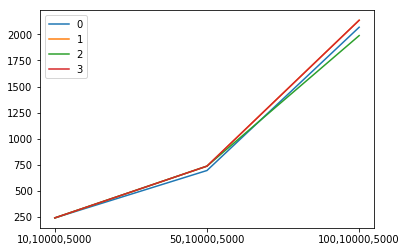

In [10]:
plt.plot(df_prec);
plt.legend(df_prec.columns);

## Detailed Cost

### Sequential

In [11]:
path = "../results/detailed/sequential"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])
transFiles = sorted([i for i in os.listdir(path) if "transfer" in i])

In [12]:
df_gen = pd.DataFrame()

for file in genFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_gen.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_gen.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_gen.loc[row,col] = vals[3][:-1]
df_gen

,generation_0
"10,10000,5000",0.002125 0.002087 0.002073 0.002068 0.002066 0...
"50,10000,5000",0.014853 0.014658 0.014713 0.014661 0.014638 0...
"100,10000,5000",0.033073 0.032723 0.032687 0.032599 0.032521 0...


In [13]:
len(df_gen.iloc[0,0].split(' '))

28

In [14]:
df_path = pd.DataFrame()

for file in pathFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_path.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_path.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_path.loc[row,col] = vals[3][:-1]
df_path

,path_0
"10,10000,5000",0.000103 0.000088 0.000087 0.000089 0.000087 0...
"50,10000,5000",0.000482 0.000468 0.000468 0.000466 0.000468 0...
"100,10000,5000",0.000915 0.000895 0.000891 0.000890 0.000901 0...


In [15]:
len(df_path.iloc[0,0].split(' '))

29

In [16]:
df_rearr = pd.DataFrame()

for file in rearrFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_rearr.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_rearr.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_rearr.loc[row,col] = vals[3][:-1]
df_rearr

,rearrange_0
"10,10000,5000",0.000066 0.000030 0.000029 0.000030 0.000029 0...
"50,10000,5000",0.000278 0.000105 0.000104 0.000103 0.000102 0...
"100,10000,5000",0.000320 0.000161 0.000158 0.000157 0.000157 0...


In [17]:
len(df_rearr.iloc[0,0].split(' '))

29

In [18]:
df_sort = pd.DataFrame()

for file in sortFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_sort.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_sort.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_sort.loc[row,col] = vals[3][:-1]
df_sort

,sort_0
"10,10000,5000",0.000729 0.000512 0.000493 0.000490 0.000493 0...
"50,10000,5000",0.000753 0.000520 0.000506 0.000510 0.000507 0...
"100,10000,5000",0.000756 0.000529 0.000518 0.000514 0.000513 0...


In [19]:
len(df_sort.iloc[0,0].split(' '))

29

### Parallel

In [21]:
path = "../results/detailed/parallel"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])
transFiles = sorted([i for i in os.listdir(path) if "transfer" in i])

In [22]:
df_gen = pd.DataFrame()

for file in genFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_gen.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_gen.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_gen.loc[row,col] = vals[3][:-1]
df_gen

,generation_0
"10,10000,5000",0.004086 0.004093 0.004120 0.004070 0.004117 0...
"50,10000,5000",0.006382 0.006292 0.006333 0.006264 0.006374 0...
"100,10000,5000",0.011623 0.012313 0.011913 0.011929 0.011853 0...


In [23]:
len(df_gen.iloc[0,0].split(' '))

28

In [24]:
df_path = pd.DataFrame()

for file in pathFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_path.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_path.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_path.loc[row,col] = vals[3][:-1]
df_path

,path_0
"10,10000,5000",0.000101 0.000087 0.000087 0.000087 0.000087 0...
"50,10000,5000",0.000481 0.000467 0.000466 0.000466 0.000472 0...
"100,10000,5000",0.000914 0.000892 0.000895 0.000913 0.000914 0...


In [25]:
len(df_path.iloc[0,0].split(' '))

29

In [26]:
df_rearr = pd.DataFrame()

for file in rearrFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_rearr.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_rearr.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_rearr.loc[row,col] = vals[3][:-1]
df_rearr

,rearrange_0
"10,10000,5000",0.000061 0.000028 0.000042 0.000035 0.000035 0...
"50,10000,5000",0.000238 0.000106 0.000146 0.000144 0.000142 0...
"100,10000,5000",0.000444 0.000158 0.000203 0.000204 0.000201 0...


In [27]:
len(df_rearr.iloc[0,0].split(' '))

29

In [28]:
df_sort = pd.DataFrame()

for file in sortFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_sort.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_sort.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_sort.loc[row,col] = vals[3][:-1]
df_sort

,sort_0
"10,10000,5000",0.000285 0.000218 0.000220 0.000208 0.000211 0...
"50,10000,5000",0.000299 0.000232 0.000233 0.000224 0.000228 0...
"100,10000,5000",0.000305 0.000235 0.000236 0.000234 0.000224 0...


In [29]:
len(df_sort.iloc[0,0].split(' '))

29

### Parallel MPI

In [31]:
path = "../results/detailed/parallelMPI"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])
transFiles = sorted([i for i in os.listdir(path) if "transfer" in i])

In [32]:
df_gen = pd.DataFrame()

for file in genFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_gen.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_gen.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_gen.loc[row,col] = vals[3][:-1]
df_gen

,generation_0,generation_1,generation_2,generation_3
"10,10000,5000",0.007622 0.014199 0.007071 0.005227 0.006596 0...,0.004221 0.005438 0.008186 0.004201 0.009128 0...,0.007321 0.004837 0.007227 0.006044 0.006731 0...,0.007931 0.004793 0.008387 0.004838 0.004086 0...
"50,10000,5000",0.022803 0.011006 0.011945 0.009912 0.010461 0...,0.010704 0.016285 0.017704 0.016217 0.020973 0...,0.025102 0.011564 0.027183 0.013466 0.017202 0...,0.015746 0.013961 0.010849 0.015181 0.011457 0...
"100,10000,5000",0.038836 0.042630 0.025142 0.034094 0.023799 0...,0.035818 0.023898 0.021024 0.029903 0.021710 0...,0.020939 0.020942 0.038219 0.026725 0.029549 0...,0.028592 0.025467 0.027116 0.029427 0.021505 0...


In [33]:
len(df_gen.iloc[0,0].split(' '))

36

In [34]:
df_path = pd.DataFrame()

for file in pathFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_path.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_path.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_path.loc[row,col] = vals[3][:-1]
df_path

,path_0,path_1,path_2,path_3
"10,10000,5000",0.000105 0.000094 0.000087 0.000087 0.000087 0...,0.000105 0.000094 0.000087 0.000087 0.000090 0...,0.000103 0.000095 0.000089 0.000087 0.000087 0...,0.000105 0.000087 0.000087 0.000087 0.000088 0...
"50,10000,5000",0.000482 0.000484 0.000472 0.000469 0.000467 0...,0.000487 0.000467 0.000488 0.000469 0.002300 0...,0.000483 0.000476 0.000469 0.000471 0.000468 0...,0.000484 0.000479 0.000465 0.000467 0.000468 0...
"100,10000,5000",0.000998 0.000939 0.000957 0.000929 0.000940 0...,0.000962 0.000949 0.000927 0.000908 0.000938 0...,0.000982 0.000926 0.000919 0.000939 0.000944 0...,0.000969 0.000931 0.000929 0.000917 0.000919 0...


In [35]:
len(df_path.iloc[0,0].split(' '))

37

In [36]:
df_rearr = pd.DataFrame()

for file in rearrFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_rearr.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_rearr.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_rearr.loc[row,col] = vals[3][:-1]
df_rearr

,rearrange_0,rearrange_1,rearrange_2,rearrange_3
"10,10000,5000",0.000067 0.000041 0.000041 0.000043 0.000040 0...,0.000066 0.000030 0.000042 0.000039 0.000040 0...,0.000075 0.000040 0.000044 0.000041 0.000037 0...,0.000068 0.000043 0.000038 0.000040 0.000040 0...
"50,10000,5000",0.000283 0.000149 0.000153 0.000147 0.000147 0...,0.000311 0.000114 0.000165 0.000151 0.000153 0...,0.000293 0.000148 0.000149 0.000157 0.000149 0...,0.000294 0.000154 0.000161 0.000150 0.000145 0...
"100,10000,5000",0.000683 0.000298 0.000240 0.000275 0.000292 0...,0.000524 0.000274 0.000226 0.000258 0.000287 0...,0.000690 0.000266 0.000311 0.000239 0.000250 0...,0.000677 0.000247 0.000222 0.000252 0.000263 0...


In [37]:
len(df_rearr.iloc[0,0].split(' '))

37

In [38]:
df_sort = pd.DataFrame()

for file in sortFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_sort.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_sort.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_sort.loc[row,col] = vals[3][:-1]
df_sort

,sort_0,sort_1,sort_2,sort_3
"10,10000,5000",0.005569 0.005427 0.006341 0.003375 0.004877 0...,0.005559 0.004601 0.001675 0.004072 0.002741 0...,0.008518 0.003877 0.005573 0.007847 0.004226 0...,0.005310 0.005295 0.002634 0.002360 0.004101 0...
"50,10000,5000",0.004073 0.001482 0.004546 0.004329 0.006106 0...,0.006681 0.000964 0.013066 0.006701 0.012650 0...,0.005618 0.004022 0.000972 0.013860 0.004996 0...,0.005655 0.007214 0.008690 0.007533 0.002700 0...
"100,10000,5000",0.005615 0.010905 0.000673 0.005974 0.016454 0...,0.004049 0.008513 0.002779 0.002726 0.006527 0...,0.005605 0.010592 0.018812 0.001481 0.007730 0...,0.005668 0.002948 0.000238 0.006090 0.005103 0...


In [39]:
len(df_sort.iloc[0,0].split(' '))

37

In [40]:
df_trans = pd.DataFrame()

for file in transFiles:
    with open(os.path.join(path,file)) as f:
        col = file.split('.')[0]
        for line in f:
            vals = line.split(' ')
            row = vals[0]+','+vals[1]+','+vals[2]
            try:
                df_trans.loc[row,col] += ' '+vals[3][:-1]
            except KeyError:
                df_trans.loc[row,col] = vals[3][:-1]
            except TypeError:
                df_trans.loc[row,col] = vals[3][:-1]
df_trans

,transfer_0,transfer_1,transfer_2,transfer_3
"10,10000,5000",0.000026 0.000005 0.000005 0.000004 0.004443 0...,0.019740 0.042889 0.019139 0.008445 0.008584 0...,0.016775 0.016431 0.017086 0.008574 0.009802 0...,0.011551 0.022363 0.012969 0.007241 0.000006 0...
"50,10000,5000",0.032067 0.000008 0.001217 0.066754 0.126839 0...,0.010881 0.023044 0.025710 0.000010 0.104031 0...,0.000040 0.001190 0.028077 0.089571 0.000010 0...,0.041991 0.007794 0.000012 0.044162 0.012347 0...
"100,10000,5000",0.000039 0.030732 0.006970 0.044739 0.063598 0...,0.038443 0.005930 0.007183 0.000011 0.000012 0...,0.009423 0.000012 0.000013 0.015026 0.020254 0...,0.051215 0.021194 0.002054 0.032787 0.007566 0...


In [41]:
len(df_trans.iloc[0,0].split(' '))

9